<img src="./files/Ridge Regression with sklearn.png"
     alt="Ridge Regression with sklearn"
     style="float: left; margin-right: 10px;" />

____________________________________________________________________________________________________
# <center><span style="color:Purple">Hello this is, *Ridge Regression with sklearn*</span>. 🤖💻
____________________________________________________________________________________________________

## Setting Up the Working Environment 🛠️

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing Datasets 📖

In [2]:
import warnings
warnings.filterwarnings('ignore')
# ---------------------------------

from sklearn.datasets import load_boston

## The Working Dataset 🔎

In [3]:
X = load_boston().data
y = load_boston().target

## Importing Ridge Regression sub_module 🧲

In [4]:
# Import Ridge regression from sklearn.linear_model
from sklearn.linear_model import Ridge

In [5]:
# Create Ridge Regression object with the default parameters
r = Ridge()

## Ridge Regression Parameters 📐

In [6]:
# get the parameters of ridge regression
r.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

## Fiting Ridge Regression ⚙️

In [7]:
## Fit the ridge regression
r.fit(X, y)

Ridge()

## Checking the parameters ☑️

In [8]:
## Access the intercept
r.intercept_

31.597669818274195

In [9]:
## Access the coefficients
r.coef_

array([-1.04595278e-01,  4.74432243e-02, -8.80467889e-03,  2.55239322e+00,
       -1.07770146e+01,  3.85400020e+00, -5.41453810e-03, -1.37265353e+00,
        2.90141589e-01, -1.29116463e-02, -8.76074394e-01,  9.67327945e-03,
       -5.33343225e-01])

# Linear Regression and Ridge Regression Comparision 01 🧭

## Fitting Linear Regression ⚙️

In [10]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

lreg.fit(X, y)

LinearRegression()

In [11]:
## Linear Regression coefficients
lreg.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [12]:
## Linear Regression intercepabst
lreg.intercept_

36.459488385089855

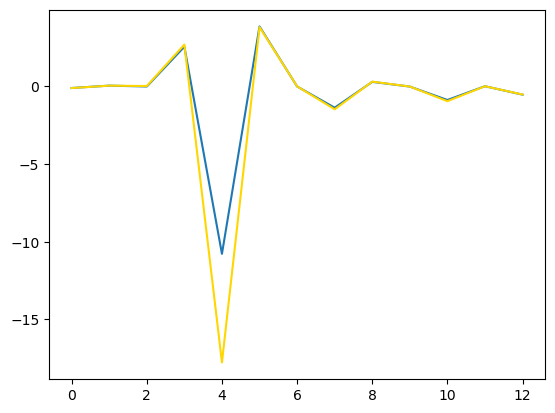

In [13]:
# It is better to plot the coefficient to see the difference
plt.plot(r.coef_)
plt.plot(lreg.coef_, c = 'gold')
plt.show()

In [14]:
## See the difference between the lowest coefficient values in both regression
print(np.min(r.coef_), np.min(lreg.coef_))

-10.777014648164531 -17.766611228299986


Even, with $\alpha = 0$ there is a difference between the two coefficients.

# Comparing Linear and Ridge Regressions 02 🧭

In [15]:
# Set fit_intercept to False
r_cent = Ridge(fit_intercept=False)

# Fit ridge regression
r_cent.fit(X, y)

Ridge(fit_intercept=False)

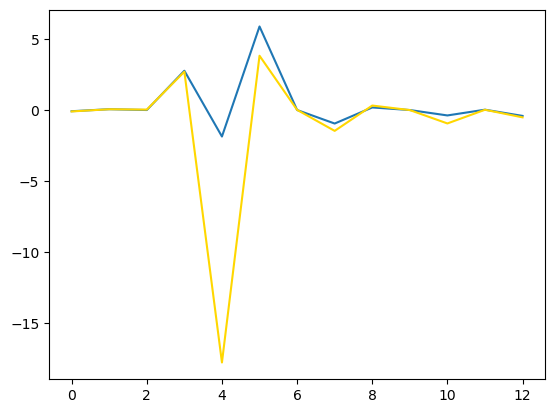

In [16]:
## Plot the coefficients
plt.plot(r_cent.coef_)
plt.plot(lreg.coef_, c = 'gold')
plt.show()

We see from the plot that after centring the data, the largest value of ridge regression coefficient in absolute value has shrunk substantially.

## Fitting Ridge Regression with a Range of Alpha Values ⚙️

In [17]:
# Initialize alpha values and an empty list for coefficients
alpha_space = np.logspace(-5, 3, 20)
ridge_coefs = []

In [18]:
for alpha in alpha_space:
    r = Ridge(alpha = alpha, normalize=True)
    r.fit(X, y)
    ridge_coefs.append(r.coef_)

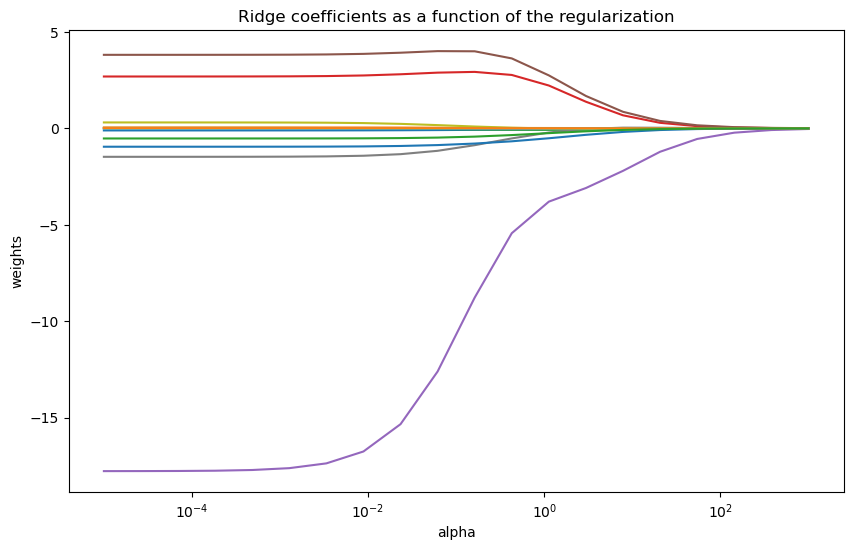

In [19]:
## Plot the coefs against alpha values
plt.figure(figsize= (10, 6))
ax = plt.gca()

ax.plot(alpha_space, ridge_coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")

plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

As $\alpha$ gets bigger, the coefficient shrink towards zero. 

## Ridge Regression with K-Fold Cross Validation 💥

### Plotting Function
We create a function to plot the results. Here is the source code:

In [20]:
def display_plot(cv_scores, cv_scores_std, k_cv, hline_func):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)
    
    std_error = cv_scores_std / np.sqrt(k_cv)
    
    ax.fill_between(alpha_space,
                    cv_scores + std_error,
                    cv_scores - std_error, 
                    alpha=0.15)
    
    ax.set_ylabel('CV Score +\- Std Error')
    ax.set_xlabel('Alpha')
    
    ax.axhline(hline_func(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

## Importing the Modules 🧲

In [21]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

## The Working Dataset 🔎

In [22]:
X = load_boston().data
y = load_boston().target

In [23]:
# Initialize an array of alphas and lists to store scores
alpha_space = np.logspace(-5, 2, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize = True)

In [24]:
# Perform a for loop
for alpha in alpha_space:
    ridge.alpha = alpha
    
    ridge_cv_scores = cross_val_score(ridge, X, y, cv = 10)
    
    ridge_scores.append(np.mean(ridge_cv_scores))

    ridge_scores_std.append(np.std(ridge_cv_scores))

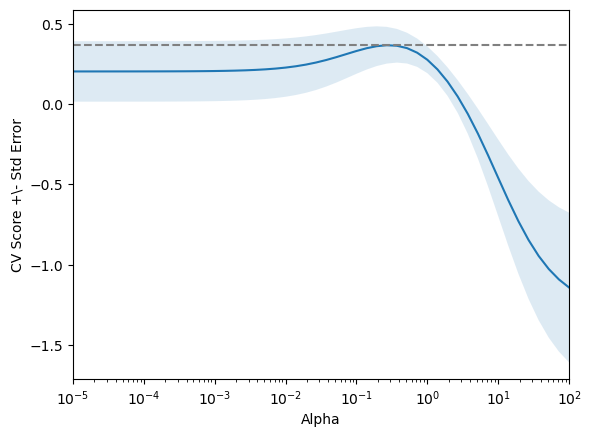

In [25]:
# Display the plot
display_plot(ridge_scores, ridge_scores_std, 10, np.max)

## Scoring Ridge Regression with Mean Squared Error 💥

In [26]:
from sklearn.metrics import mean_squared_error, make_scorer

In [27]:
# Initialize an array of alphas and lists to store scores
alpha_space = np.logspace(-5, 2, 50)
ridge_scores = []
ridge_scores_std = []

# make mse scorer
mse = make_scorer(mean_squared_error)

# Create a ridge regressor: ridge
ridge = Ridge(normalize = True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use
    ridge.alpha = alpha
    
    # Perform 10-fold CV 
    ridge_cv_scores = cross_val_score(ridge, X, y, 
                                      cv = 10,
                                     scoring = mse)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

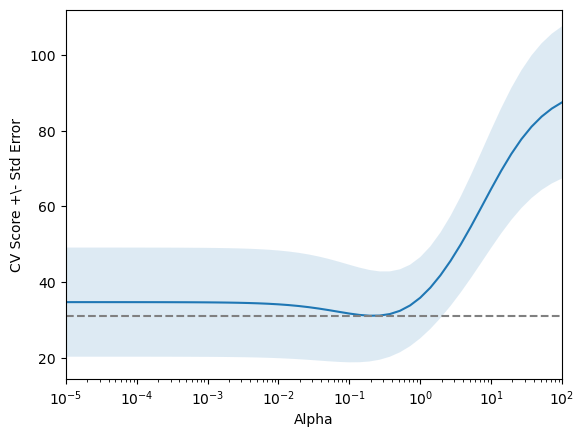

In [28]:
# Display the plot
display_plot(ridge_scores, ridge_scores_std, 10, np.min)

## Ridge Hyper Parameter Tuning with GridSearch 🔗

In [29]:
X = load_boston().data
y = load_boston().target

In [30]:
# Import GridSearchCV 
from sklearn.model_selection import GridSearchCV

In [31]:
# Setup the hyperparameter grid
alpha_space = np.logspace(-5, 2, 25)
param_grid = {'alpha': alpha_space}

In [32]:
# Instantiate ridge regression 
r_reg = Ridge(fit_intercept=False)

In [33]:
# Instantiate GridSearchCV object with 5 folds
rreg_cv = GridSearchCV(r_reg, 
                       param_grid = param_grid, 
                       cv = 5)

In [34]:
# Fit it to the data
rreg_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Ridge Regression Parameter: {}".format(rreg_cv.best_params_)) 
print("Ridge Regression Best score is {}".format(rreg_cv.best_score_))

Tuned Ridge Regression Parameter: {'alpha': 13.33521432163324}
Ridge Regression Best score is 0.4367391691513943


## Ridge Hyper Parameter Tuning with RandomizedSearch 🎲

In [35]:
# Import RandomizeSearchCV 
from sklearn.model_selection import RandomizedSearchCV

In [36]:
# Setup the distribution grid grid
alpha_space = np.logspace(-5, 2, 25)
param_dist = {'alpha': alpha_space}

In [37]:
# Instantiate ridge regression 
rid_reg = Ridge(fit_intercept=False)

In [38]:
# Instantiate RandomizedSearchCV object with 5 folds
rid_reg_cv = RandomizedSearchCV(rid_reg, 
                                param_distributions= param_dist, 
                                cv = 5)

In [39]:
# Fit it to the data
rid_reg_cv.fit(X, y)

RandomizedSearchCV(cv=5, estimator=Ridge(fit_intercept=False),
                   param_distributions={'alpha': array([1.00000000e-05, 1.95734178e-05, 3.83118685e-05, 7.49894209e-05,
       1.46779927e-04, 2.87298483e-04, 5.62341325e-04, 1.10069417e-03,
       2.15443469e-03, 4.21696503e-03, 8.25404185e-03, 1.61559810e-02,
       3.16227766e-02, 6.18965819e-02, 1.21152766e-01, 2.37137371e-01,
       4.64158883e-01, 9.08517576e-01, 1.77827941e+00, 3.48070059e+00,
       6.81292069e+00, 1.33352143e+01, 2.61015722e+01, 5.10896977e+01,
       1.00000000e+02])})

In [40]:
# Print the tuned parameters and score
print("Tuned Ridge regression Parameter: {}".format(rid_reg_cv.best_params_))
print("Ridge regression best score is {}".format(rid_reg_cv.best_score_))

Tuned Ridge regression Parameter: {'alpha': 13.33521432163324}
Ridge regression best score is 0.4367391691513943


## Ridge Regression with RidgeCV 🔧

In [41]:
# Import RidgeCV
from sklearn.linear_model import RidgeCV

In [42]:
X = load_boston().data
y = load_boston().target

In [43]:
alpha_space = np.logspace(-5, 2, 25)

In [44]:
r_reg_loocv = RidgeCV(alphas = alpha_space, fit_intercept=False)

In [45]:
r_reg_loocv.fit(X, y)

RidgeCV(alphas=array([1.00000000e-05, 1.95734178e-05, 3.83118685e-05, 7.49894209e-05,
       1.46779927e-04, 2.87298483e-04, 5.62341325e-04, 1.10069417e-03,
       2.15443469e-03, 4.21696503e-03, 8.25404185e-03, 1.61559810e-02,
       3.16227766e-02, 6.18965819e-02, 1.21152766e-01, 2.37137371e-01,
       4.64158883e-01, 9.08517576e-01, 1.77827941e+00, 3.48070059e+00,
       6.81292069e+00, 1.33352143e+01, 2.61015722e+01, 5.10896977e+01,
       1.00000000e+02]),
        fit_intercept=False)

In [46]:
r_reg_loocv.best_score_

-25.952637828855917

In [47]:
r_reg_loocv.alpha_

6.812920690579622

## Cross Validation with RidgeCV 🔧

In [48]:
# Fit 5-fold cross validation using RidgeCV
r_reg_cv = RidgeCV(alphas = alpha_space,
                   fit_intercept=False,
                   cv = 5)

In [49]:
r_reg_cv.fit(X, y)

RidgeCV(alphas=array([1.00000000e-05, 1.95734178e-05, 3.83118685e-05, 7.49894209e-05,
       1.46779927e-04, 2.87298483e-04, 5.62341325e-04, 1.10069417e-03,
       2.15443469e-03, 4.21696503e-03, 8.25404185e-03, 1.61559810e-02,
       3.16227766e-02, 6.18965819e-02, 1.21152766e-01, 2.37137371e-01,
       4.64158883e-01, 9.08517576e-01, 1.77827941e+00, 3.48070059e+00,
       6.81292069e+00, 1.33352143e+01, 2.61015722e+01, 5.10896977e+01,
       1.00000000e+02]),
        cv=5, fit_intercept=False)

In [50]:
# Print the tuned parameter and score
print("Tuned Ridge regression Parameter alpha is: {:.4f}".format(r_reg_cv.alpha_))
print("Ridge regression best score is: {:.4f}".format(r_reg_cv.best_score_))

Tuned Ridge regression Parameter alpha is: 13.3352
Ridge regression best score is: 0.4367


## Final Evaluation with Hold out Set 🏁

In [51]:
# Import train_test_split
from sklearn.model_selection import train_test_split

In [52]:
X = load_boston().data
y = load_boston().target

In [53]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10123)

In [54]:
## Fitting Ridge Regression
alpha_space = np.logspace(-5, 2, 25)
param_grid = {'alpha': alpha_space}

# Create Regression object
ridge_final = Ridge(fit_intercept=False)

# Tune to find the best parameter
ridge_final_cv = GridSearchCV(ridge_final, 
                              param_grid = param_grid, 
                              cv = 5, 
                              refit = True)

In [55]:
# Fit the model on the train set
ridge_final_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(fit_intercept=False),
             param_grid={'alpha': array([1.00000000e-05, 1.95734178e-05, 3.83118685e-05, 7.49894209e-05,
       1.46779927e-04, 2.87298483e-04, 5.62341325e-04, 1.10069417e-03,
       2.15443469e-03, 4.21696503e-03, 8.25404185e-03, 1.61559810e-02,
       3.16227766e-02, 6.18965819e-02, 1.21152766e-01, 2.37137371e-01,
       4.64158883e-01, 9.08517576e-01, 1.77827941e+00, 3.48070059e+00,
       6.81292069e+00, 1.33352143e+01, 2.61015722e+01, 5.10896977e+01,
       1.00000000e+02])})

In [56]:
# Make Predictions
preds = ridge_final_cv.predict(X_test)

In [57]:
# Score the results
print("The R^2 of the ridge regression is: {:0.4f}".format(ridge_final_cv.score(X_test, y_test)))

The R^2 of the ridge regression is: 0.7758


In [58]:
# Score the model with RMSE 
print("The RMSE is: {:.4f}".format(np.sqrt(mean_squared_error(preds, y_test))))

The RMSE is: 4.3806


__________________________________________________________________
# <span style="color:Purple">End The Project, *Thank you*</span> 🔚🥀
__________________________________________________________________